# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import cufflinks as cf

import plotly.offline as py 
import plotly.figure_factory as ff 
import plotly.graph_objs as go 

from plotly import tools 


#To plot figs on jupyter
%matplotlib inline
# figure size in inches
rcParams['figure.figsize'] = 16,8

# Importing the Dataset

In [2]:
df_loan = pd.read_csv("../../Data/Original Data/loan.csv",encoding='utf-8',header=0)

C:\Users\Apurva Tawde\a\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning:

Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
# Looking at the Data

df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [4]:
# Column Names

print(df_loan.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [5]:
# Unique Values

print(df_loan.shape)
print(df_loan.isnull().sum().value_counts())

(887379, 74)
0         34
866007    12
29         7
70276      3
886868     2
152        1
4          1
502        1
51462      1
761351     1
866569     1
145        1
44825      1
886870     1
868762     1
750326     1
454312     1
252971     1
53         1
665676     1
17659      1
dtype: int64


# Distribution of Loan Amount

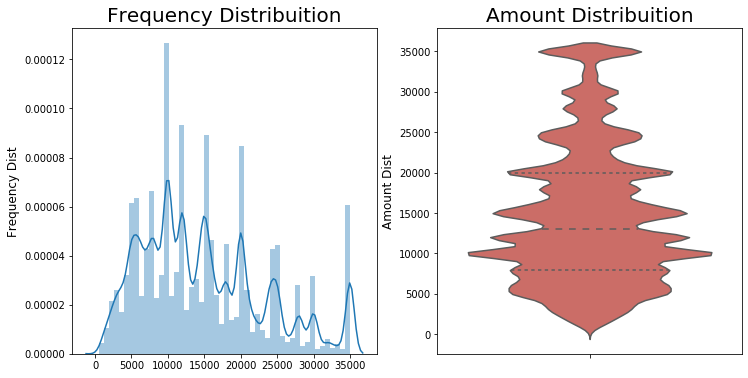

In [6]:
#I will start looking the loan_amnt column
plt.figure(figsize=(12,6))

plt.subplot(121)
g = sns.distplot(df_loan["loan_amnt"])
g.set_xlabel("", fontsize=12)
g.set_ylabel("Frequency Dist", fontsize=12)
g.set_title("Frequency Distribuition", fontsize=20)

plt.subplot(122)
g1 = sns.violinplot(y="loan_amnt", data=df_loan, 
               inner="quartile", palette="hls")
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Amount Dist", fontsize=12)
g1.set_title("Amount Distribuition", fontsize=20)

plt.show()

In [ ]:
print(df_loan.shape)
print(df_loan.isnull().sum().value_counts())

# Distribution of Interest Rate

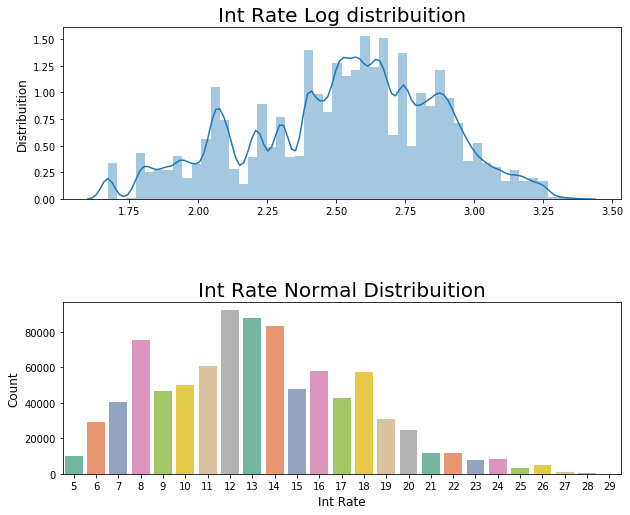

In [7]:
df_loan['int_round'] = df_loan['int_rate'].round(0).astype(int)

plt.figure(figsize = (10,8))

#Exploring the Int_rate
plt.subplot(211)
g = sns.distplot(np.log(df_loan["int_rate"]))
g.set_xlabel("", fontsize=12)
g.set_ylabel("Distribuition", fontsize=12)
g.set_title("Int Rate Log distribuition", fontsize=20)

plt.subplot(212)
g1 = sns.countplot(x="int_round",data=df_loan, 
                   palette="Set2")
g1.set_xlabel("Int Rate", fontsize=12)
g1.set_ylabel("Count", fontsize=12)
g1.set_title("Int Rate Normal Distribuition", fontsize=20)

plt.subplots_adjust(wspace = 0.2, hspace = 0.6,top = 0.9)

plt.show()

In [30]:
import statistics 
  
# creating a simple data - set 
sample = df_loan["int_rate"]
  
# Prints standard deviation 
# xbar is set to default value of 1 
print("mean of sample is % s " 
                % (statistics.mean(sample)))
print("Standard Deviation of sample is % s " 
                % (statistics.stdev(sample)))

mean of sample is 13.246739679437985 
Standard Deviation of sample is 4.3818674147124055 


# Distribution of Loan Status

In [8]:
df_loan.loc[df_loan.loan_status == \
            'Does not meet the credit policy. Status:Fully Paid', 'loan_status'] = 'NMCP Fully Paid'
df_loan.loc[df_loan.loan_status == \
            'Does not meet the credit policy. Status:Charged Off', 'loan_status'] = 'NMCP Charged Off'

Current               601779
Fully Paid            207723
Charged Off            45248
Late (31-120 days)     11591
Issued                  8460
In Grace Period         6253
Late (16-30 days)       2357
NMCP Fully Paid         1988
Default                 1219
NMCP Charged Off         761
Name: loan_status, dtype: int64


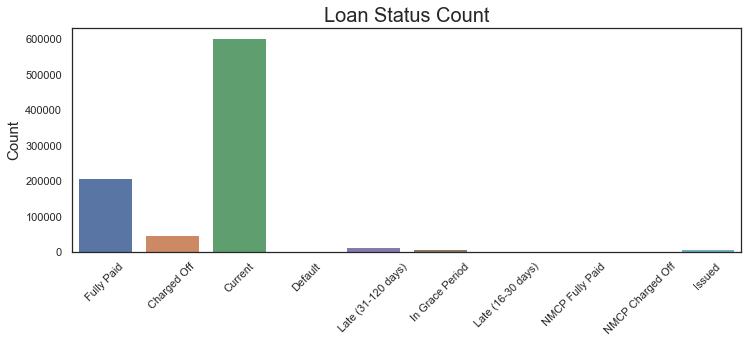

In [27]:
print(df_loan.loan_status.value_counts())

plt.figure(figsize = (12,14))

plt.subplot(311)
g = sns.countplot(x="loan_status", data=df_loan)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Count", fontsize=20)


plt.show()

# Missing Data

Text(0, 0.5, '% missing data')

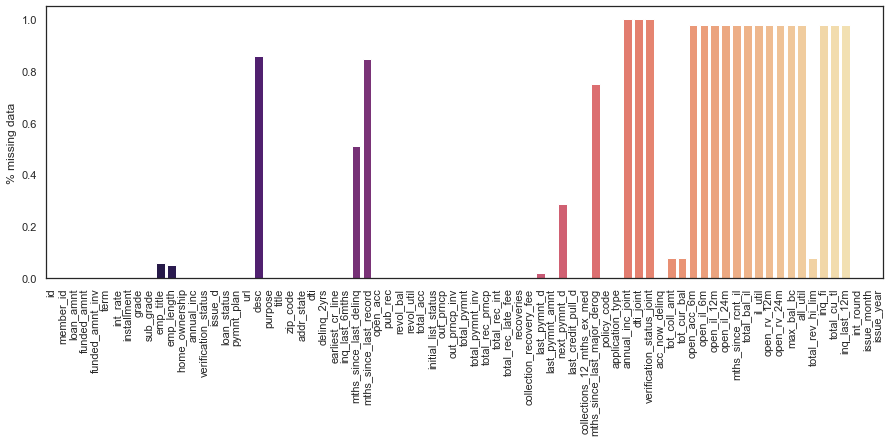

In [26]:
null_perc = df_loan.isnull().sum()/df_loan.isnull().count()

plt.figure(figsize=(15,5))

sns.barplot(x = np.arange(len(null_perc)), y =null_perc, palette="magma")

plt.xticks(np.arange(len(null_perc)),null_perc.index,rotation=90)
plt.ylabel('% missing data')

# Correlation

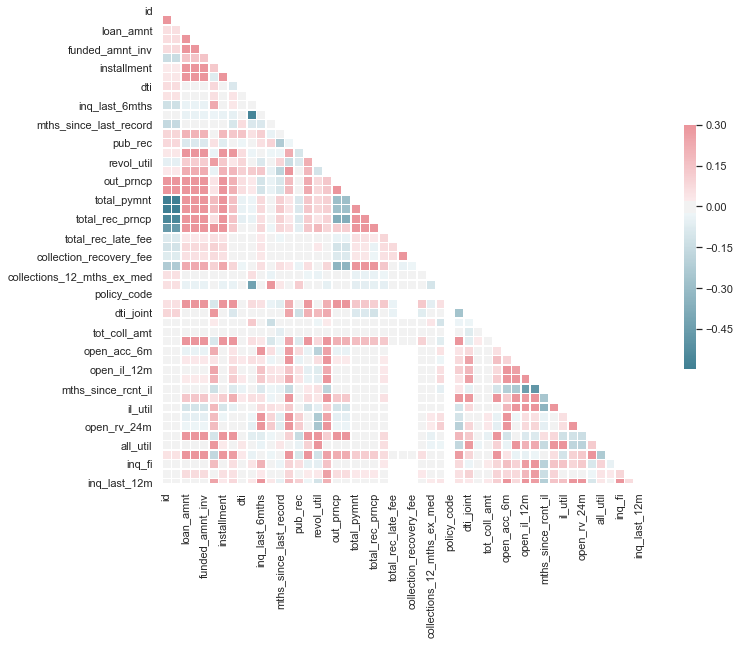

In [24]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = df_loan.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [31]:
print(corr)

                                   id  member_id  loan_amnt  funded_amnt  \
id                           1.000000   0.999443   0.063803     0.066058   
member_id                    0.999443   1.000000   0.064461     0.066754   
loan_amnt                    0.063803   0.064461   1.000000     0.999263   
funded_amnt                  0.066058   0.066754   0.999263     1.000000   
funded_amnt_inv              0.071502   0.072308   0.997115     0.998025   
int_rate                    -0.142963  -0.142205   0.145023     0.145160   
installment                  0.025347   0.026036   0.944977     0.946005   
annual_inc                   0.033990   0.034146   0.332698     0.332466   
dti                          0.067781   0.067824   0.020675     0.021075   
delinq_2yrs                  0.049648   0.049904  -0.000159     0.000151   
inq_last_6mths              -0.126950  -0.127257  -0.034168    -0.034711   
mths_since_last_delinq      -0.008540  -0.008682  -0.038080    -0.038117   
mths_since_l

In [48]:
import numpy as np

indices = np.where(corr > 0.5)
indices = [(corr.index[x], corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]

In [49]:
print(indices)

[('id', 'member_id'), ('id', 'out_prncp'), ('id', 'out_prncp_inv'), ('member_id', 'out_prncp'), ('member_id', 'out_prncp_inv'), ('loan_amnt', 'funded_amnt'), ('loan_amnt', 'funded_amnt_inv'), ('loan_amnt', 'installment'), ('loan_amnt', 'out_prncp'), ('loan_amnt', 'out_prncp_inv'), ('loan_amnt', 'total_rec_int'), ('funded_amnt', 'funded_amnt_inv'), ('funded_amnt', 'installment'), ('funded_amnt', 'out_prncp'), ('funded_amnt', 'out_prncp_inv'), ('funded_amnt', 'total_rec_int'), ('funded_amnt_inv', 'installment'), ('funded_amnt_inv', 'out_prncp'), ('funded_amnt_inv', 'out_prncp_inv'), ('funded_amnt_inv', 'total_rec_int'), ('int_rate', 'int_round'), ('installment', 'out_prncp'), ('installment', 'out_prncp_inv'), ('installment', 'total_pymnt'), ('installment', 'total_pymnt_inv'), ('annual_inc', 'annual_inc_joint'), ('mths_since_last_delinq', 'mths_since_last_major_derog'), ('open_acc', 'total_acc'), ('open_acc', 'open_il_6m'), ('revol_bal', 'max_bal_bc'), ('revol_bal', 'total_rev_hi_lim'), (